# Core 22 8.0.0 2023 benchmarking

In [1]:
import glob
import os
import altair as alt
import numpy as np
import pandas as pd
import seaborn as sns
from fah_log_parser import ParseError, parse, science_log
from fah_log_parser.util.pandas import parse_project_logs

/home/hmacdope/anaconda3/envs/openmm-core-v2/lib/python3.9/site-packages/pydantic-2.0b2-py3.9.egg/pydantic/_internal/_config.py:237: UserWarning: Valid config keys have changed in V2:
* 'allow_mutation' has been removed
  warnings.warn(message, UserWarning)


In [2]:
if os.path.exists("checkpoint_17113"):
    data_113 = pd.read_feather("checkpoint_17113")
else:
    data_113 = parse_project_logs("../PROJ17113/", sample=3000)
    data_113.reset_index().to_feather("checkpoint_17113")
data_113.info()

3201 files found in path ../PROJ17113/


/home/hmacdope/anaconda3/envs/openmm-core-v2/lib/python3.9/site-packages/rich-13.4.2-py3.9.egg/rich/live.py:231: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2824 entries, (2, 146, 0) to (6, 145, 0)
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   os                     2824 non-null   object 
 1   platform_name          2824 non-null   object 
 2   platform_vendor        2824 non-null   object 
 3   platform_version       2824 non-null   object 
 4   device_name            2824 non-null   object 
 5   device_vendor          2824 non-null   object 
 6   device_version         2824 non-null   object 
 7   device_driver_version  2824 non-null   object 
 8   cuda_enabled           2824 non-null   bool   
 9   perf_ns_per_day        2824 non-null   float64
dtypes: bool(1), float64(1), object(8)
memory usage: 218.8+ KB


In [3]:
data_113

,,,os,platform_name,platform_vendor,platform_version,device_name,device_vendor,device_version,device_driver_version,cuda_enabled,perf_ns_per_day
run,clone,gen,,,,,,,,,,
2,146,0,win32 10,NVIDIA CUDA,NVIDIA Corporation,OpenCL 3.0 CUDA 12.0.94,NVIDIA GeForce RTX 3080 Ti,NVIDIA Corporation,OpenCL 3.0 CUDA,527.56,True,535.6160
13,155,0,win32 10,NVIDIA CUDA,NVIDIA Corporation,OpenCL 3.0 CUDA 11.7.101,NVIDIA GeForce RTX 3060,NVIDIA Corporation,OpenCL 3.0 CUDA,516.94,True,47.3623
6,130,0,win32 10,NVIDIA CUDA,NVIDIA Corporation,OpenCL 3.0 CUDA 12.1.98,NVIDIA GeForce RTX 4070 Ti,NVIDIA Corporation,OpenCL 3.0 CUDA,531.41,True,222.0210
11,132,0,win32 10,NVIDIA CUDA,NVIDIA Corporation,OpenCL 3.0 CUDA 12.1.98,NVIDIA GeForce RTX 4070 Ti,NVIDIA Corporation,OpenCL 3.0 CUDA,531.41,True,35.1548
5,103,0,linux 5.15.0-1034-azure,NVIDIA CUDA,NVIDIA Corporation,OpenCL 3.0 CUDA 12.0.133,NVIDIA GeForce GTX 1080 Ti,NVIDIA Corporation,OpenCL 3.0 CUDA,525.78.01,True,64.1075
...,...,...,...,...,...,...,...,...,...,...,...,...
12,170,0,win32 10,NVIDIA CUDA,NVIDIA Corporation,OpenCL 3.0 CUDA 11.7.101,NVIDIA GeForce RTX 3060,NVIDIA Corporation,OpenCL 3.0 CUDA,516.94,True,138.6090
2,107,0,linux 5.15.0-1034-azure,NVIDIA CUDA,NVIDIA Corporation,OpenCL 3.0 CUDA 12.0.133,NVIDIA GeForce GTX 1080 Ti,NVIDIA Corporation,OpenCL 3.0 CUDA,525.78.01,True,535.6160
4,16,0,linux 5.15.0-1034-azure,NVIDIA CUDA,NVIDIA Corporation,OpenCL 3.0 CUDA 12.0.133,NVIDIA GeForce GTX 1080 Ti,NVIDIA Corporation,OpenCL 3.0 CUDA,525.78.01,True,77.5790


In [4]:
gpu_table_113 = data_113.groupby('device_name').mean("perf_ns_per_day")


In [5]:
if os.path.exists("checkpoint_17110"):
    data_110 = pd.read_feather("checkpoint_17110")
else:
    data_110 = parse_project_logs("../PROJ17110/", sample=3000)
    data_110.reset_index().to_feather("checkpoint_17110")
data_110.info()

3910 files found in path ../PROJ17110/


/home/hmacdope/anaconda3/envs/openmm-core-v2/lib/python3.9/site-packages/rich-13.4.2-py3.9.egg/rich/live.py:231: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2602 entries, (2, 72, 0) to (1, 102, 0)
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   os                     2602 non-null   object 
 1   platform_name          2602 non-null   object 
 2   platform_vendor        2602 non-null   object 
 3   platform_version       2602 non-null   object 
 4   device_name            2602 non-null   object 
 5   device_vendor          2602 non-null   object 
 6   device_version         2602 non-null   object 
 7   device_driver_version  2602 non-null   object 
 8   cuda_enabled           2602 non-null   bool   
 9   perf_ns_per_day        2600 non-null   float64
dtypes: bool(1), float64(1), object(8)
memory usage: 206.3+ KB


In [6]:
gpu_table_110 = data_110.groupby('device_name').mean("perf_ns_per_day")


In [7]:
gpu_table_110 = gpu_table_110.rename(columns={"perf_ns_per_day":"perf_P17110_7.7.0", "cuda_enabled":"cuda_enabled_110"})

In [8]:
gpu_table_113 = gpu_table_113.rename(columns={"perf_ns_per_day":"perf_P17113_8.0.0", "cuda_enabled":"cuda_enabled_113"})

In [9]:
merged_df = gpu_table_113.merge(gpu_table_110, left_index=True, right_index=True)


In [10]:
merged_df

,cuda_enabled_113,perf_P17113_8.0.0,cuda_enabled_110,perf_P17110_7.7.0
device_name,,,,
Baffin,0.0,10.037581,0.000000,12.397440
NVIDIA GeForce GTX 1070,1.0,133.960149,1.000000,98.026957
NVIDIA GeForce GTX 1080 Ti,1.0,182.254364,0.991304,148.986835
NVIDIA GeForce GTX 970,1.0,109.658800,1.000000,104.708158
NVIDIA GeForce GTX 980,1.0,99.413200,1.000000,49.930829
NVIDIA GeForce RTX 2060,1.0,261.135000,1.000000,136.512307
NVIDIA GeForce RTX 3080 Ti,1.0,230.702372,1.000000,147.002869
gfx1010:xnack-,0.0,49.569600,0.000000,118.890606
gfx906,0.0,96.847700,0.000000,72.290186


In [11]:
merged_df.sort_index()

,cuda_enabled_113,perf_P17113_8.0.0,cuda_enabled_110,perf_P17110_7.7.0
device_name,,,,
Baffin,0.0,10.037581,0.000000,12.397440
NVIDIA GeForce GTX 1070,1.0,133.960149,1.000000,98.026957
NVIDIA GeForce GTX 1080 Ti,1.0,182.254364,0.991304,148.986835
NVIDIA GeForce GTX 970,1.0,109.658800,1.000000,104.708158
NVIDIA GeForce GTX 980,1.0,99.413200,1.000000,49.930829
NVIDIA GeForce RTX 2060,1.0,261.135000,1.000000,136.512307
NVIDIA GeForce RTX 3080 Ti,1.0,230.702372,1.000000,147.002869
gfx1010:xnack-,0.0,49.569600,0.000000,118.890606
gfx906,0.0,96.847700,0.000000,72.290186


In [12]:
clean = merged_df.drop(columns=["cuda_enabled_113", "cuda_enabled_110"])

In [13]:
clean

,perf_P17113_8.0.0,perf_P17110_7.7.0
device_name,,
Baffin,10.037581,12.397440
NVIDIA GeForce GTX 1070,133.960149,98.026957
NVIDIA GeForce GTX 1080 Ti,182.254364,148.986835
NVIDIA GeForce GTX 970,109.658800,104.708158
NVIDIA GeForce GTX 980,99.413200,49.930829
NVIDIA GeForce RTX 2060,261.135000,136.512307
NVIDIA GeForce RTX 3080 Ti,230.702372,147.002869
gfx1010:xnack-,49.569600,118.890606
gfx906,96.847700,72.290186


<Figure size 800x2000 with 0 Axes>

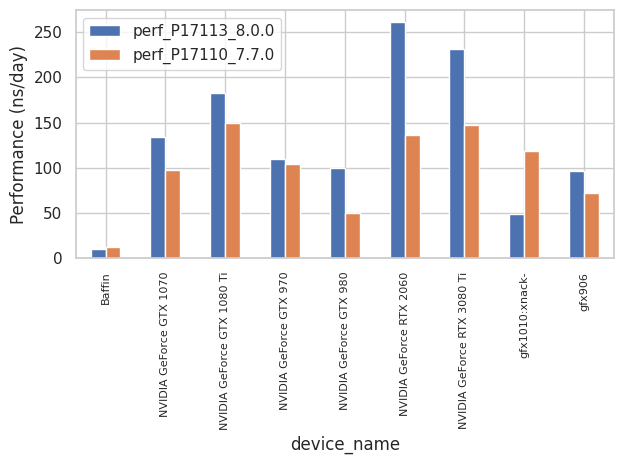

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 20))  # Adjust the values as needed
clean.plot.bar(ylabel="Performance (ns/day)")
plt.xticks(fontsize=8)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.tight_layout()
plt.savefig("openmm_c22_8.0.0_performance.png")

<Figure size 640x480 with 0 Axes>